# Evaluate Classification model

- Classification model: Random Forest
- Evaluate __Classification metrics__ scores:
  - Accuracy Score
    - https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
  - Confusion Matrix
    - https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn-metrics-confusion-matrix
  - Precision Score
    - https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
  - Recall Score
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
  - F1 Score
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
- Predict probability
  - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba
- Precision-Recall Curve
  - https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics
  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html
- Area Under the Curve (AUC)
  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

from typing import Any


LOAD_DATA = load_breast_cancer()


def models_dict() -> dict[str, Any]:
    """Models definitions dictionary."""
    return {
        'Logistic_Regression': LogisticRegression(),
        'Linear_SVM': _svm('linear'),
        'Kernel_SVM': _svm('rbf'),
        'K_Neighbors': KNeighborsClassifier(),
        'Decision_Tree': DecisionTreeClassifier(
            max_depth=3,
            random_state=0
        ),
        'Random_Forest': RandomForestClassifier(
            max_depth=3,
            random_state=0
        )
    }


def _svm(kernel_type: str) -> Any:
    """SVM constructor."""
    return SVC(
        kernel=kernel_type,
        probability=True,
        random_state=0
    )


def train_and_test_data_set(x_train_data, x_test_data, y_train_data, y_test_data) -> dict[str, Any]:
    """Train and Test dataset dictionary."""
    scalar = StandardScaler()
    x_train_scaled = scalar.fit_transform(x_train_data)
    x_test_scaled = scalar.transform(x_test_data)
    return {
        'Train': [x_train_scaled, y_train_data],
        'Test': [x_test_scaled, y_test_data]
    }


def show_metrics_scores(
    train_metrics_score: float | str,
    test_metrics_score: float | str,
    title: str
) -> None:
    """Print train and test Accuracy Scores."""
    print(f'{title}')
    print(
        f'Train:\n{train_metrics_score}'
    )
    print(
        f'Test:\n{test_metrics_score}'
    )


def plot_pr_curve_and_auc(y_true: Any, predict_proba: Any) -> None:
    """Plot PR Curve and AUC.
    """
    precision, recall, thresholds = precision_recall_curve(
        y_true,
        predict_proba[:, 0],
        pos_label=0
    )

    plt.figure(figsize=(12, 4))

    # PR Curve
    _plot_prepare_frame(1)
    plt.plot(
        recall,
        precision,
        label=f'PR Curve (AUC = {_auc_score(recall, precision)})'
    )
    plt.plot(
        [0, 1],
        [1, 1],
        linestyle='--',
        color='purple',
        label='Ideal Line'
    )
    for threshold in [.3, .5, .8]:
        tg_index = np.argmin(
            np.abs(thresholds - threshold)
        )
        plt.plot(
            recall[tg_index],
            precision[tg_index],
            marker='o',
            markersize=10,
            label=f'Threshould = {threshold}'
        )
    _plot_meta_informations('Precision-Recall Curve', 'Recall', 'Precision')

    # AUC
    _plot_prepare_frame(2)
    plt.plot(
        _threshoulds_plot_range(thresholds),
        recall,
        label='Recall'
    )
    plt.plot(
        _threshoulds_plot_range(thresholds),
        precision,
        label='Precision'
    )
    _plot_meta_informations('Area Under the Curve', 'Threshould', 'Score')

    plt.show()


def _auc_score(recall: Any, precision: Any) -> float:
    """Return AUC score."""
    return round(
        auc(recall, precision),
        4
    )


def _threshoulds_plot_range(thresholds: Any) -> Any:
    """Define and return a range to be plot."""
    return np.append(thresholds, 1)


def _plot_prepare_frame(order: int) -> None:
    """Prepare a frame for plot."""
    plt.subplot(1, 2, order)
    plt.grid()


def _plot_meta_informations(title_label: str, x_label: str, y_label: str) -> None:
    """Prepare adding diagram informations."""
    plt.legend()
    plt.title(title_label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)


In [2]:
# Prepare dataset.
df = pd.DataFrame(
    LOAD_DATA.data,
    columns=LOAD_DATA.feature_names
)
df['y'] = LOAD_DATA.target

# Split the data into Explanatory and Objective variables.
X = df[
    ['mean radius', 'mean texture']
]
y = df['y']

# Split dataset into training and test data.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0
)

print(X_test)

     mean radius  mean texture
512       13.400         20.52
457       13.210         25.25
439       14.020         15.66
298       14.260         18.17
37        13.030         18.42
..           ...           ...
7         13.710         20.83
408       17.990         20.66
523       13.710         18.68
361       13.300         21.57
553        9.333         21.94

[171 rows x 2 columns]


In [3]:
# Construct Random Forest classification model.
rf_classifier = RandomForestClassifier(
    max_depth=3,
    random_state=0
).fit(
    X_train,
    y_train
)

# Calculate predicted values.
y_train_prediction = rf_classifier.predict(X_train)
y_test_prediction = rf_classifier.predict(X_test)

In [4]:
# Check Accuracy Scores.
train_accuracy_score = accuracy_score(
    y_train,
    y_train_prediction
)
test_accuracy_score = accuracy_score(
    y_test,
    y_test_prediction
)

show_metrics_scores(
    train_accuracy_score,
    test_accuracy_score,
    'Accuracy Scores'
)

Accuracy Scores
Train:
0.9195979899497487
Test:
0.8888888888888888


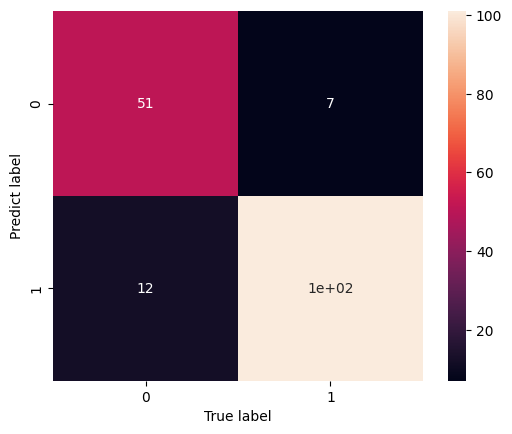

In [5]:
# Check Confusion Matrix.
matrix = confusion_matrix(
    y_test,
    y_test_prediction
)

sns.heatmap(
    matrix.T,
    square=True,
    annot=True
)
plt.xlabel('True label')
plt.ylabel('Predict label')
plt.show()

In [6]:
# Check Precision Scores.
train_precision_score = precision_score(
    y_train,
    y_train_prediction,
    pos_label=0
)
test_precision_score = precision_score(
    y_test,
    y_test_prediction,
    pos_label=0
)

show_metrics_scores(
    train_precision_score,
    test_precision_score,
    'Precision Scores'
)

Precision Scores
Train:
0.9534883720930233
Test:
0.8793103448275862


In [7]:
# Check Recall Scores.
train_recall_score = recall_score(
    y_train,
    y_train_prediction,
    pos_label=0
)
test_recall_score = recall_score(
    y_test,
    y_test_prediction,
    pos_label=0
)

show_metrics_scores(
    train_recall_score,
    test_recall_score,
    'Recall Scores'
)

Recall Scores
Train:
0.825503355704698
Test:
0.8095238095238095


In [8]:
# Check F1 Scores.
train_f1_score = f1_score(
    y_train,
    y_train_prediction,
    pos_label=0
)
test_f1_score = f1_score(
    y_test,
    y_test_prediction,
    pos_label=0
)

show_metrics_scores(
    train_f1_score,
    test_f1_score,
    'F1 Scores'
)

F1 Scores
Train:
0.8848920863309353
Test:
0.8429752066115702


In [9]:
# Show various classification metrics scores report.
train_classification_report = classification_report(
    y_train,
    y_train_prediction
)
test_classification_report = classification_report(
    y_test,
    y_test_prediction
)

show_metrics_scores(
    train_classification_report,
    test_classification_report,
    'Classification Report'
)

Classification Report
Train:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88       149
           1       0.90      0.98      0.94       249

    accuracy                           0.92       398
   macro avg       0.93      0.90      0.91       398
weighted avg       0.92      0.92      0.92       398

Test:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        63
           1       0.89      0.94      0.91       108

    accuracy                           0.89       171
   macro avg       0.89      0.87      0.88       171
weighted avg       0.89      0.89      0.89       171



In [18]:
# Calc predict probabilities.
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba
train_predict_proba = rf_classifier.predict_proba(X_train)
test_predict_proba = rf_classifier.predict_proba(X_test)

print(train_predict_proba[:4])
print(test_predict_proba[:4])

[[0.02592192 0.97407808]
 [0.09656751 0.90343249]
 [0.09158286 0.90841714]
 [0.89796431 0.10203569]]
[[0.4094982  0.5905018 ]
 [0.43246982 0.56753018]
 [0.15599818 0.84400182]
 [0.20438491 0.79561509]]


/usr/local/lib/python3.11/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


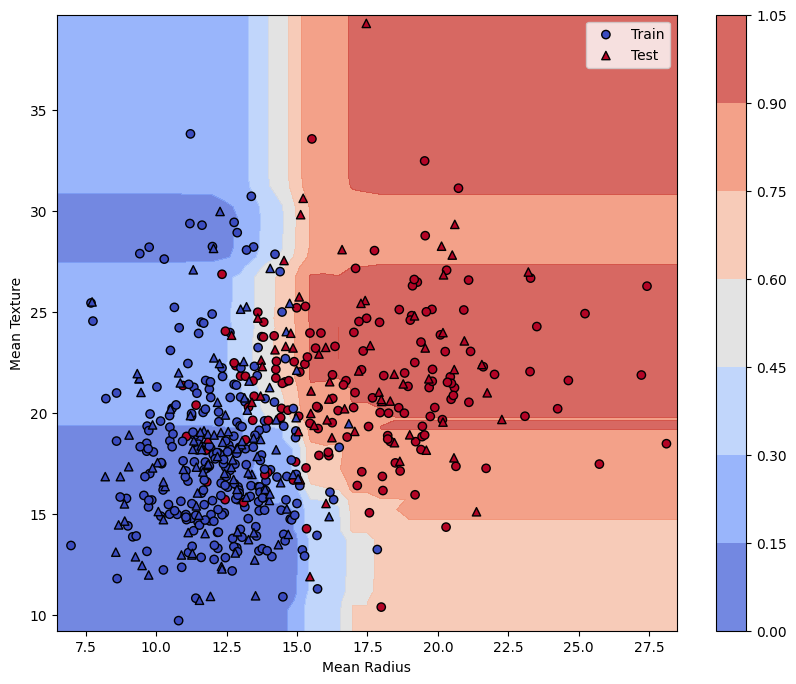

In [11]:
# Visualize predict probabilities by region.
def x_mean_radius(x):
    return x['mean radius']


def x_mean_texture(x):
    return x['mean texture']


def set_plot_range(val, step: float = 0.5):
    return np.arange(
        val.min() - step,
        val.max() + step,
        step
    )


def plot_scatter(x_1, x_2, y_val, marker: str, title: str) -> None:
    plt.scatter(
        x_1,
        x_2,
        c=y_val,
        marker=marker,
        edgecolors='k',
        cmap=plt.cm.coolwarm_r,
        label=title
    )


x_range = set_plot_range(
    x_mean_radius(X)
)
y_range = set_plot_range(
    x_mean_texture(X)
)

xx, yy = np.meshgrid(x_range, y_range)

Z = rf_classifier.predict_proba(
    np.c_[xx.ravel(), yy.ravel()]
)
Z = Z[:, 0].reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(
    xx,
    yy,
    Z,
    alpha=0.8,
    cmap=plt.cm.coolwarm
)
plt.colorbar()

plot_scatter(
    x_mean_radius(X_train),
    x_mean_texture(X_train),
    y_train,
    'o',
    'Train'
)
plot_scatter(
    x_mean_radius(X_test),
    x_mean_texture(X_test),
    y_test,
    '^',
    'Test'
)
plt.legend()
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.show()

In [12]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(
    y_test,
    test_predict_proba[:, 0],
    pos_label=0
)

print(precision[:10])
print(recall[:10])
print(thresholds[:10])

[0.36842105 0.37951807 0.38650307 0.39622642 0.40127389 0.40645161
 0.40909091 0.41176471 0.41447368 0.41721854]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.01416888 0.01965043 0.02044037 0.02098376 0.02293686 0.0247737
 0.02521702 0.02592192 0.02725525 0.03397665]


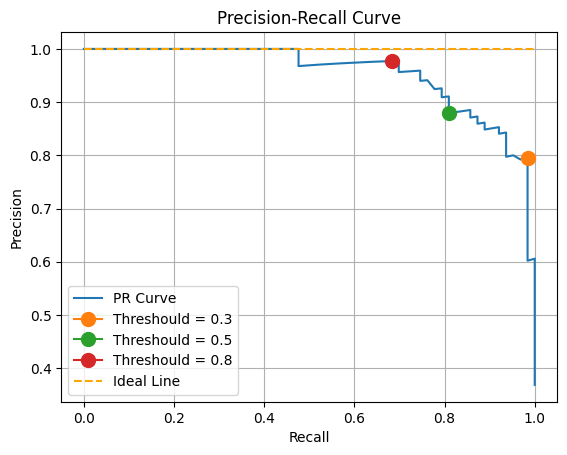

In [13]:
plt.plot(
    recall,
    precision,
    label='PR Curve'
)

for threshold in [.3, .5, .8]:
    tg_index = np.argmin(
        np.abs(thresholds - threshold)
    )
    plt.plot(
        recall[tg_index],
        precision[tg_index],
        marker='o',
        markersize=10,
        label=f'Threshould = {threshold}'
    )

plt.plot(
    [0, 1],
    [1, 1],
    linestyle='--',
    color='orange',
    label='Ideal Line'
)
plt.legend()
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

In [14]:
# Area Under the Curve (AUC)
auc(recall, precision)

0.9543523166632816

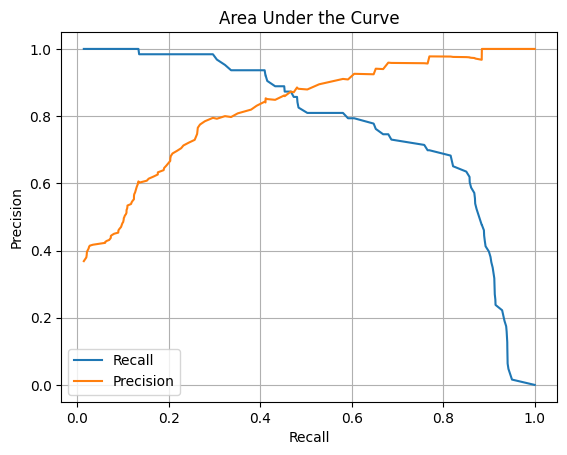

In [15]:
threshoulds_plot_range = np.append(thresholds, 1)

plt.plot(
    threshoulds_plot_range,
    recall,
    label='Recall'
)
plt.plot(
    threshoulds_plot_range,
    precision,
    label='Precision'
)
plt.legend()
plt.title('Area Under the Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

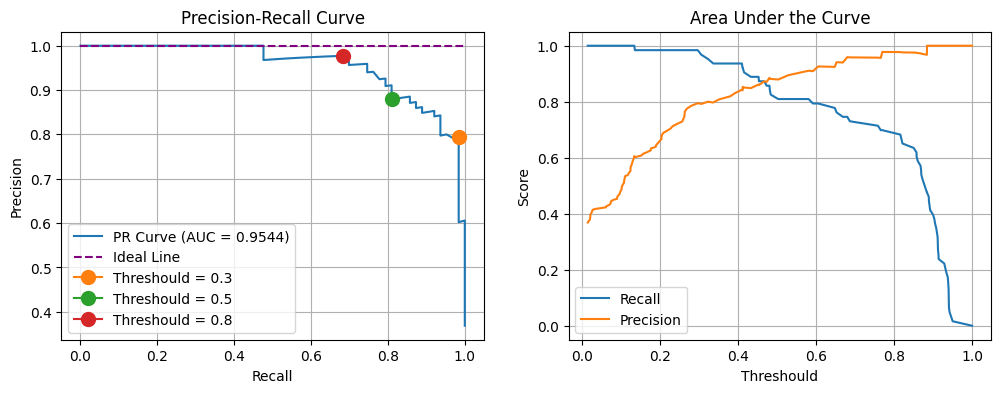

In [16]:
plot_pr_curve_and_auc(
    y_test,
    test_predict_proba
)

Logistic_Regression score report
Train


,0,1,accuracy,macro avg,weighted avg,type,model
precision,0.888889,0.889734,0.889447,0.889311,0.889418,Train,Logistic_Regression
recall,0.805369,0.939759,0.889447,0.872564,0.889447,Train,Logistic_Regression
f1-score,0.845070,0.914062,0.889447,0.879566,0.888234,Train,Logistic_Regression
support,149.000000,249.000000,0.889447,398.000000,398.000000,Train,Logistic_Regression


Test


,0,1,accuracy,macro avg,weighted avg,type,model
precision,0.885246,0.918182,0.906433,0.901714,0.906048,Test,Logistic_Regression
recall,0.857143,0.935185,0.906433,0.896164,0.906433,Test,Logistic_Regression
f1-score,0.870968,0.926606,0.906433,0.898787,0.906107,Test,Logistic_Regression
support,63.000000,108.000000,0.906433,171.000000,171.000000,Test,Logistic_Regression


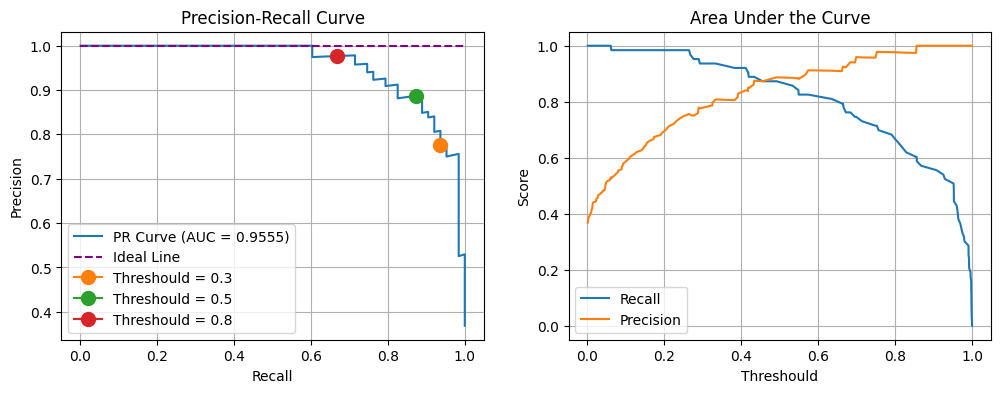



Linear_SVM score report
Train


,0,1,accuracy,macro avg,weighted avg,type,model
precision,0.891473,0.873606,0.879397,0.882539,0.880295,Train,Linear_SVM
recall,0.771812,0.943775,0.879397,0.857794,0.879397,Train,Linear_SVM
f1-score,0.827338,0.907336,0.879397,0.867337,0.877387,Train,Linear_SVM
support,149.000000,249.000000,0.879397,398.000000,398.000000,Train,Linear_SVM


Test


,0,1,accuracy,macro avg,weighted avg,type,model
precision,0.885246,0.918182,0.906433,0.901714,0.906048,Test,Linear_SVM
recall,0.857143,0.935185,0.906433,0.896164,0.906433,Test,Linear_SVM
f1-score,0.870968,0.926606,0.906433,0.898787,0.906107,Test,Linear_SVM
support,63.000000,108.000000,0.906433,171.000000,171.000000,Test,Linear_SVM


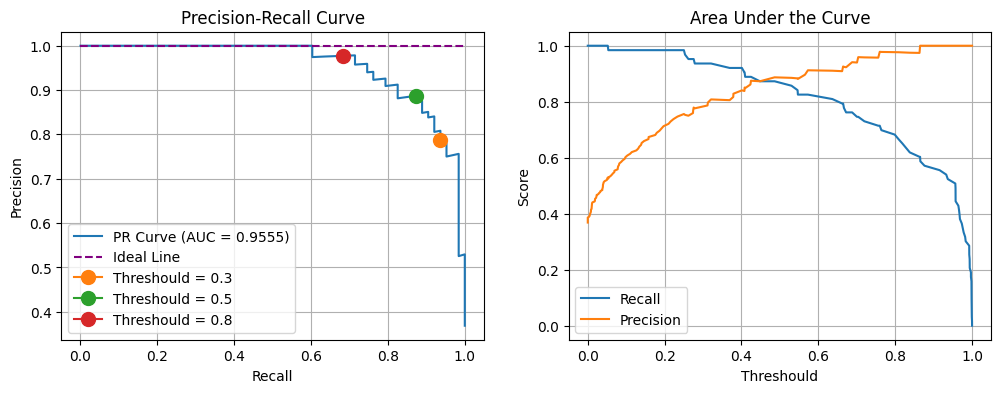



Kernel_SVM score report
Train


,0,1,accuracy,macro avg,weighted avg,type,model
precision,0.923664,0.895131,0.904523,0.909398,0.905813,Train,Kernel_SVM
recall,0.812081,0.959839,0.904523,0.885960,0.904523,Train,Kernel_SVM
f1-score,0.864286,0.926357,0.904523,0.895321,0.903119,Train,Kernel_SVM
support,149.000000,249.000000,0.904523,398.000000,398.000000,Train,Kernel_SVM


Test


,0,1,accuracy,macro avg,weighted avg,type,model
precision,0.898305,0.910714,0.906433,0.904510,0.906142,Test,Kernel_SVM
recall,0.841270,0.944444,0.906433,0.892857,0.906433,Test,Kernel_SVM
f1-score,0.868852,0.927273,0.906433,0.898063,0.905749,Test,Kernel_SVM
support,63.000000,108.000000,0.906433,171.000000,171.000000,Test,Kernel_SVM


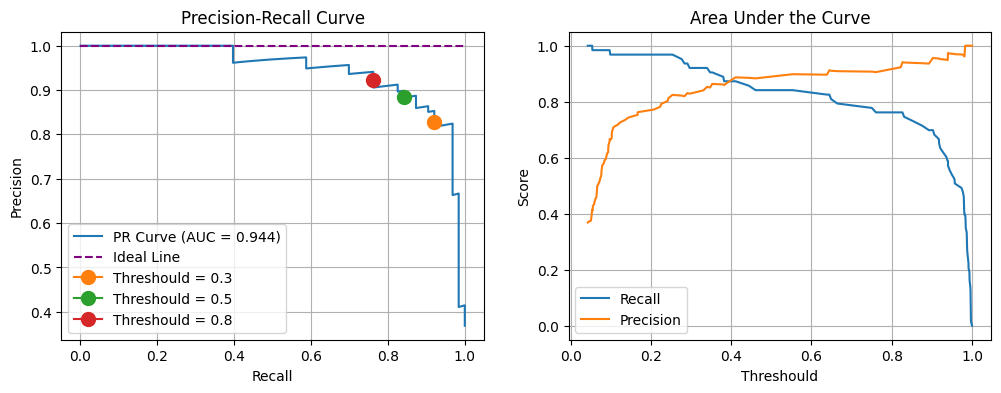



K_Neighbors score report
Train


,0,1,accuracy,macro avg,weighted avg,type,model
precision,0.920290,0.915385,0.917085,0.917837,0.917221,Train,K_Neighbors
recall,0.852349,0.955823,0.917085,0.904086,0.917085,Train,K_Neighbors
f1-score,0.885017,0.935167,0.917085,0.910092,0.916392,Train,K_Neighbors
support,149.000000,249.000000,0.917085,398.000000,398.000000,Train,K_Neighbors


Test


,0,1,accuracy,macro avg,weighted avg,type,model
precision,0.850000,0.891892,0.877193,0.870946,0.876458,Test,K_Neighbors
recall,0.809524,0.916667,0.877193,0.863095,0.877193,Test,K_Neighbors
f1-score,0.829268,0.904110,0.877193,0.866689,0.876536,Test,K_Neighbors
support,63.000000,108.000000,0.877193,171.000000,171.000000,Test,K_Neighbors


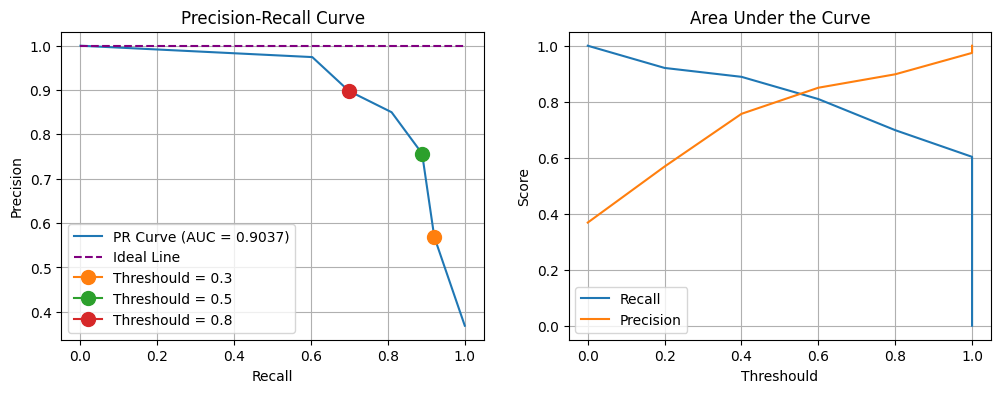



Decision_Tree score report
Train


,0,1,accuracy,macro avg,weighted avg,type,model
precision,0.889655,0.920949,0.909548,0.905302,0.909233,Train,Decision_Tree
recall,0.865772,0.935743,0.909548,0.900757,0.909548,Train,Decision_Tree
f1-score,0.877551,0.928287,0.909548,0.902919,0.909293,Train,Decision_Tree
support,149.000000,249.000000,0.909548,398.000000,398.000000,Train,Decision_Tree


Test


,0,1,accuracy,macro avg,weighted avg,type,model
precision,0.838235,0.941748,0.900585,0.889991,0.903611,Test,Decision_Tree
recall,0.904762,0.898148,0.900585,0.901455,0.900585,Test,Decision_Tree
f1-score,0.870229,0.919431,0.900585,0.894830,0.901304,Test,Decision_Tree
support,63.000000,108.000000,0.900585,171.000000,171.000000,Test,Decision_Tree


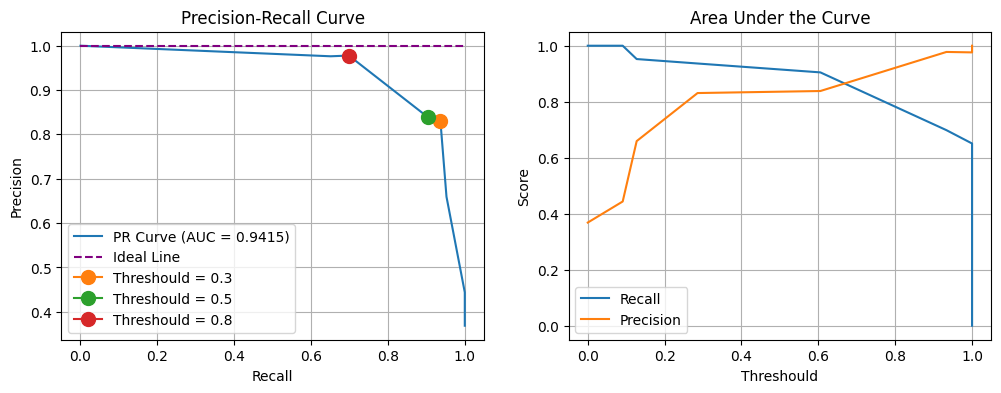



Random_Forest score report
Train


,0,1,accuracy,macro avg,weighted avg,type,model
precision,0.953488,0.903346,0.919598,0.928417,0.922118,Train,Random_Forest
recall,0.825503,0.975904,0.919598,0.900703,0.919598,Train,Random_Forest
f1-score,0.884892,0.938224,0.919598,0.911558,0.918258,Train,Random_Forest
support,149.000000,249.000000,0.919598,398.000000,398.000000,Train,Random_Forest


Test


,0,1,accuracy,macro avg,weighted avg,type,model
precision,0.879310,0.893805,0.888889,0.886558,0.888465,Test,Random_Forest
recall,0.809524,0.935185,0.888889,0.872354,0.888889,Test,Random_Forest
f1-score,0.842975,0.914027,0.888889,0.878501,0.887850,Test,Random_Forest
support,63.000000,108.000000,0.888889,171.000000,171.000000,Test,Random_Forest


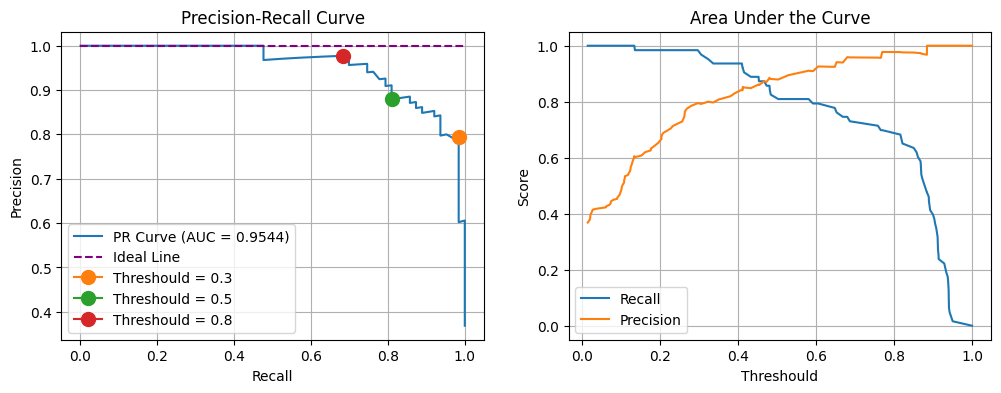

In [17]:
# Plot anotehr models evaluations.
data_set = train_and_test_data_set(X_train, X_test, y_train, y_test)
X_train_scaled = data_set['Train'][0]

for model_key in models_dict().keys():
    print(f'{model_key} score report')
    
    model = models_dict()[model_key].fit(
        X_train_scaled,
        y_train
    )

    for data_set_key in data_set.keys():
        print(data_set_key)
        X_data = data_set[data_set_key][0]
        y_true = data_set[data_set_key][1]
        y_predict = model.predict(X_data)

        df_scores = pd.DataFrame(
            classification_report(
                y_true,
                y_predict,
                output_dict=True
            )
        )
        df_scores['type'] = data_set_key
        df_scores['model'] = model_key
        display(df_scores)

        if data_set_key == 'Test':
            plot_pr_curve_and_auc(
                y_true,
                model.predict_proba(X_data)
            )
    print('\n')